<a href="https://colab.research.google.com/github/BrainyHaron/Python_lessons/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_28%20(genetic%20algorithms).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gym                          
from gym import logger as gymlogger 
from gym.wrappers import Monitor    
gymlogger.set_level(40)             
import numpy as np                  
import random                       
import matplotlib                   
import matplotlib.pyplot as plt     
import matplotlib.colors as colors 

%matplotlib inline

import glob   
import io     
import base64 
from IPython.display import HTML 
import time                      

from IPython import display as ipythondisplay  


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

!apt install swig cmake libopenmpi-dev zlib1g-dev 
!pip install stable-baselines==2.5.1 box2d box2d-kengz 


!pip install gym pyvirtualdisplay > /dev/null 2>&1 
!pip install xvfbwrapper 
!apt-get update 
!sudo apt-get install xvfb 
!apt-get install xdpyinfo 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
libopenmpi-dev is already the newest version (2.1.1-8).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (444 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 146442 files and direct

In [6]:
from pyvirtualdisplay import Display 
display = Display(visible=0, size=(1400, 900))
display.start()

In [7]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env


def calculateStep(observation,bot):
  '''
    Функция для получения действия бота на основе наблюдения
        Входные параметры:
        - observation - наблюдение
        - bot - бот
  '''
  actions = []
  for act_ind in range(num_actions):
    action = 0
    for observ_ind in range(num_observations):
      action += bot[act_ind][observ_ind] * observation[observ_ind]
    action = min(1.0, action)
    action = max(-1.0, action)
    actions.append(action)
  return actions


def playEnv(bot):
  '''
    Функция вывода на экран результата обучения
        Входные параметры:
        - bot - бот
  '''
  wrappedEnv = wrap_env(env) 
  wrappedEnv.seed(0)         
  observation = wrappedEnv.reset() 
  print("observation:",observation)
  i=0
  action = np.zeros(4)
  while True:
      env.render() 
      observation,reward,done,_ = wrappedEnv.step(action)
      action = calculateStep(observation,bot)
      if done: 
        break;
      
  wrappedEnv.close()
  show_video()


def getSurvPopul(popul, val, nsurv, reverse):
    '''
      Функция получения выжившей популяции
          Входные параметры:
          - popul - наша популяция
          - val - текущие значения
          - nsurv - количество выживших
          - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
    '''
    newpopul = [] 

    sval= sorted(val, reverse=reverse)
    for i in range(nsurv):            
        index = val.index(sval[i])    
        newpopul.append(popul[index]) 
    return newpopul, sval             


def getParents(curr_popul, nsurv): 
    '''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
    ''' 
    indexp1 = random.randint(0, nsurv - 1) 
    indexp2 = random.randint(0, nsurv - 1)     
    botp1 = curr_popul[indexp1] 
    botp2 = curr_popul[indexp2]  
    return botp1,botp2 


def crossPointFrom2Parents(botp1, botp2, j):
    '''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - j - номер компонента бота
    '''
    pindex = np.random.random()
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x


def countValue(popul, action):
  '''
    Функция по которой будет вычисляться успех текущей симуляции
        Входные параметры:
        - popul - популяция ботов
        - action - действия
  '''
  reward_list=[]
  for bot in popul:
    env.seed(0)
    env.reset()
    i=0 
    tmp=0
    done=False
    while done!=True:
      observation,reward,done,_ = env.step(action) 
      action = calculateStep(observation,bot)
      tmp+=reward
    reward_list.append(tmp) 
    
  return reward_list  

In [8]:
env = gym.make('BipedalWalker-v3')

In [9]:
total=[]       
n = 100        
nsurv = 50     
nnew = n-nsurv 
epohs = 200    
mut = 0.7      
bestVal = -200 
bestBot = []
curr_time = time.time()
num_actions = 4       
num_observations = 24 
action = np.zeros(4)  

popul = [] 


for i in range(n):    
  bot = [] 
  for j in range(4):  
    actions = []
    for k in range(24):
      s = np.random.uniform(-1,1)
      actions.append(s)
    bot.append(actions)
  popul.append(bot)

In [9]:
playEnv(popul[np.random.randint(0, n-1)])

observation: [ 2.74646818e-03  6.54533971e-06 -8.53474494e-04 -1.60000443e-02
  9.23600048e-02  1.98129308e-03  8.59931901e-01 -1.72333869e-04
  1.00000000e+00  3.27102654e-02  1.98121043e-03  8.53600875e-01
 -1.34810635e-03  1.00000000e+00  4.40813571e-01  4.45819676e-01
  4.61422324e-01  4.89549696e-01  5.34102261e-01  6.02460444e-01
  7.09148169e-01  8.85930896e-01  1.00000000e+00  1.00000000e+00]


0 92.95635080337524   [-76.63160787339407, -81.50210894545286, -84.47125455903077]
Лучшее значение:  -76.63160787339407 Среднее значение лучшего бота:  0.07897595831380365
1 19.76062822341919   [-69.92182820540057, -82.12812167215914, -82.26048406419568]
Лучшее значение:  -69.92182820540057 Среднее значение лучшего бота:  -0.008749673624821694
2 20.442614793777466   [-16.408671420072316, -64.40008202095022, -75.61094365989415]
Лучшее значение:  -16.408671420072316 Среднее значение лучшего бота:  0.0003975141259099646
3 16.91364812850952   [-48.95277388910689, -84.34031984239921, -89.24093971398248]
Лучшее значение:  -16.408671420072316 Среднее значение лучшего бота:  -0.010490674049881734
4 11.061336994171143   [-49.98855351617715, -81.07100749310713, -92.3249945946741]
Лучшее значение:  -16.408671420072316 Среднее значение лучшего бота:  -0.010490674049881734
5 10.600496292114258   [26.71430339325358, -83.17783442384085, -84.68327290349225]
Лучшее значение:  26.71430339325358 Среднее 

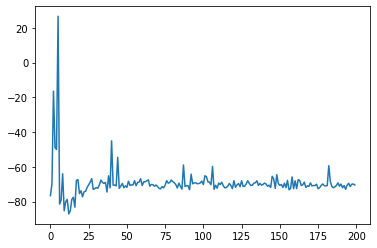

In [10]:
for it in range(epohs):
  val = countValue(popul,action) 
  newpopul, sval = getSurvPopul(popul, val, nsurv, 1) 

  if sval[0] > bestVal:
    bestVal = sval[0]
    bestBot = newpopul[0]
    bBot = np.array(bestBot)
    np.save('/content/drive/My Drive/bestBot_bipedal', bBot)

  print(it, time.time() - curr_time, " ", sval[0:3]) 
  print('Лучшее значение: ', bestVal, 'Среднее значение лучшего бота: ', np.mean(bestBot))
  total.append(sval[0])
  curr_time = time.time() 

  
  for k in range(nnew):
    botp1, botp2 = getParents(newpopul, nsurv) 
    newbot = []

    
    for j in range(len(botp1)):
      x = crossPointFrom2Parents(botp1, botp2,j) 
      m=0     
      while m<mut:
        t = random.randint(0,3)
        x[t] = random.random()*2-1
        m += 1
      newbot.append(x)
    newpopul.append(newbot)
  popul = newpopul
  popul = np.array(popul)
  
plt.plot(total)
print(np.mean(total)) 

In [11]:
bestBot=np.load('/content/drive/My Drive/bestBot_bipedal.npy')
playEnv(bestBot)

observation: [ 2.74646818e-03  6.54533971e-06 -8.53474494e-04 -1.60000443e-02
  9.23600048e-02  1.98129308e-03  8.59931901e-01 -1.72333869e-04
  1.00000000e+00  3.27102654e-02  1.98121043e-03  8.53600875e-01
 -1.34810635e-03  1.00000000e+00  4.40813571e-01  4.45819676e-01
  4.61422324e-01  4.89549696e-01  5.34102261e-01  6.02460444e-01
  7.09148169e-01  8.85930896e-01  1.00000000e+00  1.00000000e+00]


In [10]:
total=[]      
n = 100       
nsurv = 30     
nnew = n-nsurv 
epohs = 600    
mut = 0.7      
bestVal = 220  
curr_time = time.time()
num_actions = 4       
num_observations = 24 
action = np.zeros(4)  

popul = []
bestBot=np.load('/content/drive/My Drive/bestBot_bipedal.npy')
for i in range(nsurv):
  popul.append(bestBot)

for i in range(n):
  bot = [] 

  
  for j in range(4):
    actions = []

    
    for k in range(24):
      s = np.random.uniform(-1,1)
      actions.append(s)
    bot.append(actions)
  popul.append(bot)

In [ ]:
# Запускаем обучение
for it in range(epohs):
  val = countValue(popul,action)
  newpopul, sval = getSurvPopul(popul, val, nsurv, 1)  

  # Сохраняем лучшего получившегося бота
  if sval[0] > bestVal:
    bestVal = sval[0]
    bestBot = newpopul[0]
    bBot = np.array(bestBot)
    np.save('/content/drive/My Drive/bestBot_bipedal_v2', bBot)

  # Принтим трех лучших, лучшкго и среднее значение лучшего
  print(it, time.time() - curr_time, " ", sval[0:3]) 
  print('Лучшее значение: ', bestVal, 'Среднее значение лучшего бота: ', np.mean(bestBot))
  total.append(sval[0])
  curr_time = time.time() 

  # Выбираем двух родителей
  for k in range(nnew):
    botp1, botp2 = getParents(newpopul, nsurv) 
    newbot = []
    
    # Скрещиваем и получаем новых ботов
    for j in range(len(botp1)): 
      x = crossPointFrom2Parents(botp1, botp2,j)
      for t in range(4):
        if random.random()<mut:
          x[t] += random.random()*2-1
      newbot.append(x)      # закидываем элемент в бота
    newpopul.append(newbot) # добавляем бота

  popul = newpopul
  popul = np.array(popul)
plt.plot(total)
print(np.mean(total)) 

0 106.50719666481018   [26.05923355368654, -5.993706380223055, -7.623842245923378]
Лучшее значение:  220 Среднее значение лучшего бота:  -0.4359824961793117
1 11.264310121536255   [-84.72011961623838, -93.69631547435417, -96.05344788950647]
Лучшее значение:  220 Среднее значение лучшего бота:  -0.4359824961793117
2 14.274683713912964   [-49.41518364010208, -85.23876124873824, -91.00876983474315]
Лучшее значение:  220 Среднее значение лучшего бота:  -0.4359824961793117
3 12.908852815628052   [-81.25957074634279, -81.33992523097236, -81.62478224245389]
Лучшее значение:  220 Среднее значение лучшего бота:  -0.4359824961793117
4 15.525965213775635   [-47.944453356253355, -83.48229215447262, -83.83759590133769]
Лучшее значение:  220 Среднее значение лучшего бота:  -0.4359824961793117
5 14.28345274925232   [-61.703044610539756, -81.65960731005353, -82.65362588783907]
Лучшее значение:  220 Среднее значение лучшего бота:  -0.4359824961793117
6 17.317477464675903   [-66.27115483058645, -69.0864

In [11]:
bestBot=np.load('/content/drive/My Drive/bestBot_bipedal_v2.npy')
playEnv(bestBot)

observation: [ 2.74646818e-03  6.54533971e-06 -8.53474494e-04 -1.60000443e-02
  9.23600048e-02  1.98129308e-03  8.59931901e-01 -1.72333869e-04
  1.00000000e+00  3.27102654e-02  1.98121043e-03  8.53600875e-01
 -1.34810635e-03  1.00000000e+00  4.40813571e-01  4.45819676e-01
  4.61422324e-01  4.89549696e-01  5.34102261e-01  6.02460444e-01
  7.09148169e-01  8.85930896e-01  1.00000000e+00  1.00000000e+00]
